<a href="https://colab.research.google.com/github/jonathanahc/PLN_Practicas/blob/main/Ejercicios_de_preprocesamiento_y_normalizaci%C3%B3n_de_texto_Jonathan_Herrera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import re
from unidecode import unidecode
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [13]:
df = pd.read_csv('/content/drive/MyDrive/PLN/tuits_cambio_climatico.csv', engine='python')

In [14]:
df.head(50)

,tuit
0,Excelente iniciativa de el uso de energías ren...
1,Inspirador que la contaminación plástica afect...
2,Datos muestran que los niveles de CO2 disminuy...
3,Indignante que las temperaturas globales sigan...
4,Inspirador que la deforestación continúe 🌊 #So...
5,Investigación revela que la deforestación cont...
6,Me alegra que las temperaturas globales sigan ...
7,Inaceptable que las temperaturas globales siga...
8,Datos muestran que los niveles de CO2 disminuy...
9,Estadísticas indican que la deforestación cont...


In [22]:
def tuits_limpios(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'\S+@\S+', '', tweet)
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = unidecode(tweet)
    return tweet

df['tuit'] = df['tuit'].apply(tuits_limpios)

In [23]:
df.head(50)

,tuit
0,excelente iniciativa de el uso de energias ren...
1,inspirador que la contaminacion plastica afect...
2,datos muestran que los niveles de co2 disminuy...
3,indignante que las temperaturas globales sigan...
4,inspirador que la deforestacion continue
5,investigacion revela que la deforestacion cont...
6,me alegra que las temperaturas globales sigan ...
7,inaceptable que las temperaturas globales siga...
8,datos muestran que los niveles de co2 disminuy...
9,estadisticas indican que la deforestacion cont...


# **Tokenización con Spacy**

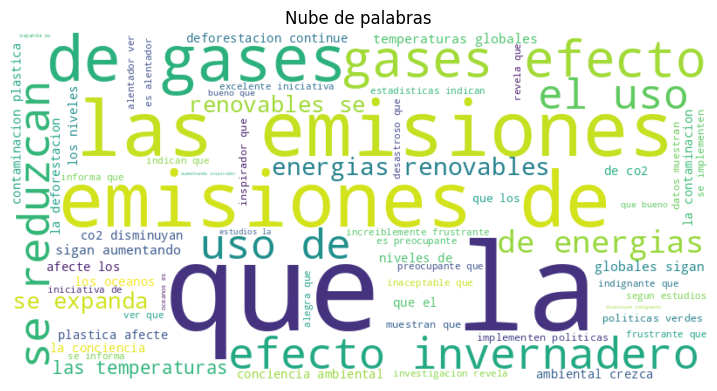

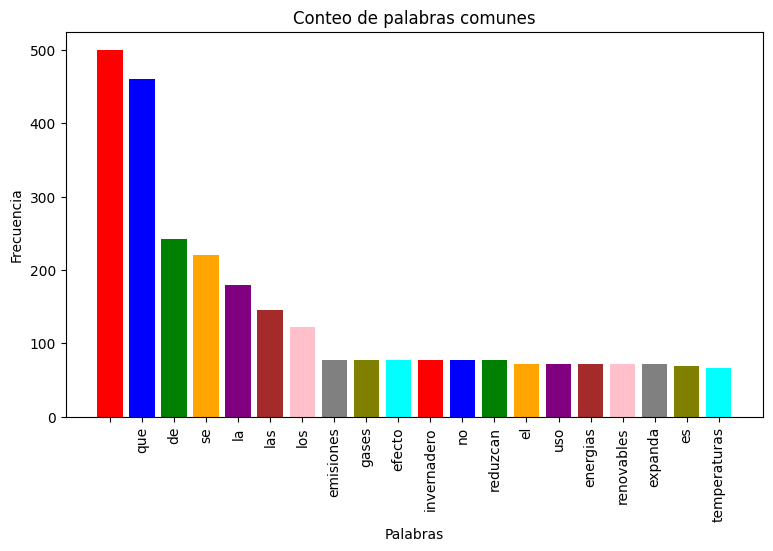

In [65]:
def token_con_spacy (dataframe, columna):
  nlp = spacy.load("en_core_web_sm")
  doc = dataframe[columna].apply(nlp)
  tokens = [token.text for doc in doc for token in doc]

  texto_tokens = ' '.join(tokens)
  wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(texto_tokens)
  plt.figure(figsize=(9, 5))
  plt.imshow(wordcloud1, interpolation='bilinear')
  plt.axis('off')
  plt.title('Nube de palabras')
  plt.show()

  conteo = Counter(tokens)
  comun = conteo.most_common(20)
  palabras, freqs = zip(*comun)
  colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
  plt.figure(figsize=(9,5))
  plt.bar(palabras, freqs, color=colores)
  plt.xlabel('Palabras')
  plt.ylabel('Frecuencia')
  plt.title('Conteo de palabras comunes')
  plt.xticks(rotation=90)
  plt.show()

token_con_spacy(df, 'tuit')

# **Lematización con Spacy**

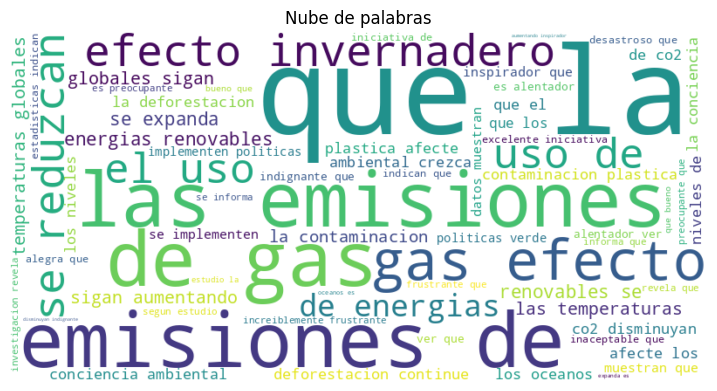

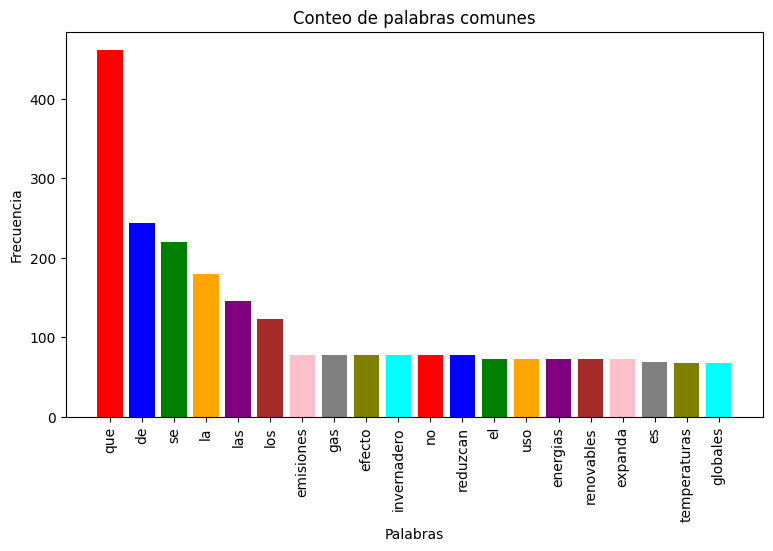

In [63]:
def lema_con_spacy(dataframe, columna):
    nlp = spacy.load("en_core_web_sm")
    doc = dataframe[columna].apply(nlp)
    lemmas = [token.lemma_ for doc in doc for token in doc if not token.is_punct and not token.is_space]

    texto_lema = ' '.join(lemmas)
    wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(texto_lema)
    plt.figure(figsize=(9, 5))
    plt.imshow(wordcloud2, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de palabras')
    plt.show()

    conteo = Counter(lemmas)
    comun = conteo.most_common(20)
    palabras, freqs = zip(*comun)
    colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    plt.figure(figsize=(9,5))
    plt.bar(palabras, freqs, color=colores)
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.title('Conteo de palabras comunes')
    plt.xticks(rotation=90)
    plt.show()

lema_con_spacy(df, 'tuit')

# **Stopwords con Spacy**

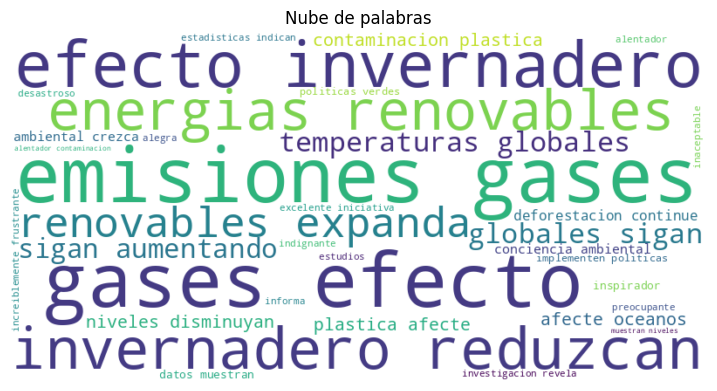

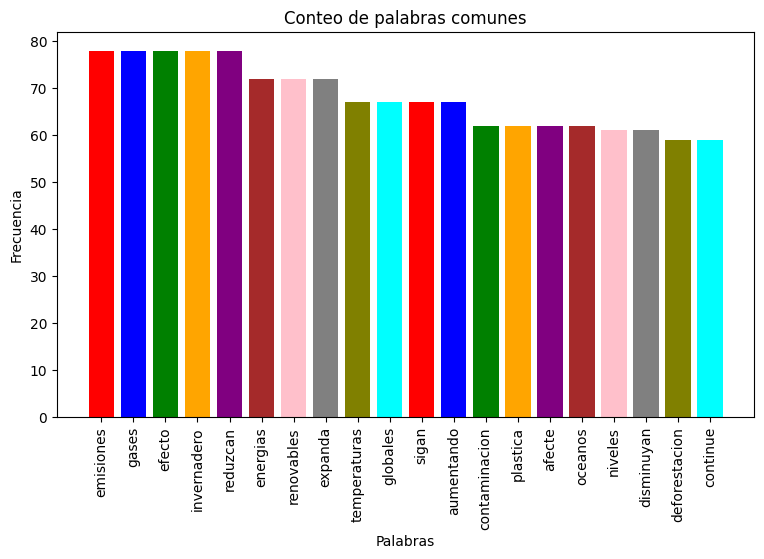

In [71]:
def stopwords_con_spacy(dataframe, columna):
  nlp = spacy.load("es_core_news_sm")
  doc = dataframe[columna].apply(nlp)
  stopwords = [token.text for doc in doc for token in doc if not token.is_stop and token.is_alpha]

  texto_stop = ' '.join(stopwords)
  wordcloud3 = WordCloud(width=800, height=400, background_color='white').generate(texto_stop)
  plt.figure(figsize=(9, 5))
  plt.imshow(wordcloud3, interpolation='bilinear')
  plt.axis('off')
  plt.title('Nube de palabras')
  plt.show()

  conteo = Counter(stopwords)
  comun = conteo.most_common(20)
  palabras, freqs = zip(*comun)
  colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
  plt.figure(figsize=(9,5))
  plt.bar(palabras, freqs, color=colores)
  plt.xlabel('Palabras')
  plt.ylabel('Frecuencia')
  plt.title('Conteo de palabras comunes')
  plt.xticks(rotation=90)
  plt.show()

stopwords_con_spacy(df, 'tuit')